## Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [3]:
df.shape

(50000, 2)

<AxesSubplot: xlabel='sentiment', ylabel='count'>

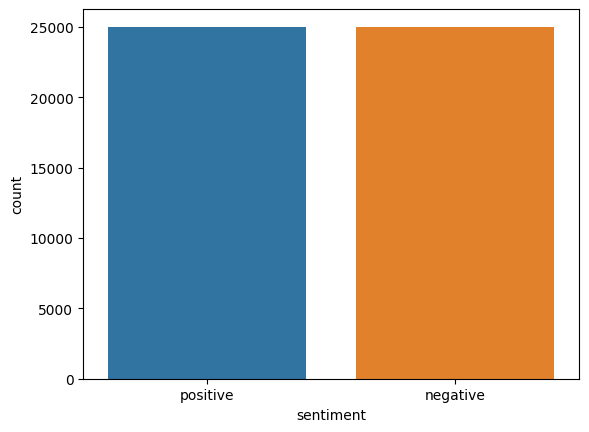

In [4]:
import seaborn as sns
sns.countplot(df,x=df.sentiment)

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [6]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Checking for duplicates

In [7]:
print(f"Number of Duplicates in the Data: {df.duplicated().sum()}")
print(f"Number of Nulls in the Data: \n {df.isnull().sum()}")

Number of Duplicates in the Data: 418
Number of Nulls in the Data: 
 review       0
sentiment    0
dtype: int64


In [34]:
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re, string, unicodedata
from bs4 import BeautifulSoup

stop = set(stopwords.words('english'))
# print(stop)
punctuations = list(string.punctuation)
stop.update(punctuations)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

# Applying function on review column
df['review'] = df['review'].apply(denoise_text)

C:\Users\ORIONORIGINAL\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [36]:
df.head()

,review,sentiment,sentiment LabelEncoder
0,one reviewers mentioned watching oz episode exactly happened first thing struck oz brutality unflinching scenes set right word trust show faint hearted show pulls punches regards sex classic use called oz nickname given oswald maximum security state focuses mainly emerald experimental section prison cells glass fronts face privacy high em city home irish death dodgy dealings shady agreements never far would say main appeal show due fact goes shows forget pretty pictures painted mainstream forget forget mess first episode ever saw struck nasty say ready watched developed taste got accustomed high levels graphic injustice guards sold inmates kill order get away well middle class inmates turned prison bitches due lack street skills prison watching may become comfortable uncomfortable get touch darker,positive,1
1,wonderful little filming technique fashion gives sometimes sense realism entire actors extremely well michael sheen got voices pat truly see seamless editing guided references diary well worth watching terrificly written performed masterful production one great comedy realism really comes home little fantasy guard rather use traditional techniques remains solid plays knowledge particularly scenes concerning orton halliwell sets flat murals decorating every terribly well,positive,1
2,thought wonderful way spend time hot summer sitting air conditioned theater watching plot dialogue witty characters likable well bread suspected serial may disappointed realize match point risk thought proof woody allen still fully control style many us grown laughed one comedies years say never impressed scarlet managed tone image jumped right spirited young may crown jewel wittier wears interesting great comedy go see,positive,1
3,basically family little boy thinks zombie closet parents fighting movie slower soap jake decides become rambo kill first going make film must decide thriller drama movie parents divorcing arguing like real jake closet totally ruins expected see boogeyman similar instead watched drama meaningless thriller well playing parents descent shots ignore,negative,0
4,petter time visually stunning film mattei offers us vivid portrait human movie seems telling us power success people different situations variation arthur play director transfers action present time new york different characters meet one connected one another next one seems know previous point film sophisticated luxurious taken see people live world live thing one gets souls picture different stages loneliness one big city exactly best place human relations find sincere one discerns case people acting good steve rosario carol michael adrian rest talented make characters come wish mattei good luck await anxiously next,positive,1


## Preprocessing
---

In [37]:
X = df['review']
y = df['sentiment']

Label Encoding the output labels


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [39]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [40]:
le.classes_ # [0, 1]

array(['negative', 'positive'], dtype=object)

In [41]:
df['sentiment LabelEncoder']=y
df.head()

,review,sentiment,sentiment LabelEncoder
0,one reviewers mentioned watching oz episode exactly happened first thing struck oz brutality unflinching scenes set right word trust show faint hearted show pulls punches regards sex classic use called oz nickname given oswald maximum security state focuses mainly emerald experimental section prison cells glass fronts face privacy high em city home irish death dodgy dealings shady agreements never far would say main appeal show due fact goes shows forget pretty pictures painted mainstream forget forget mess first episode ever saw struck nasty say ready watched developed taste got accustomed high levels graphic injustice guards sold inmates kill order get away well middle class inmates turned prison bitches due lack street skills prison watching may become comfortable uncomfortable get touch darker,positive,1
1,wonderful little filming technique fashion gives sometimes sense realism entire actors extremely well michael sheen got voices pat truly see seamless editing guided references diary well worth watching terrificly written performed masterful production one great comedy realism really comes home little fantasy guard rather use traditional techniques remains solid plays knowledge particularly scenes concerning orton halliwell sets flat murals decorating every terribly well,positive,1
2,thought wonderful way spend time hot summer sitting air conditioned theater watching plot dialogue witty characters likable well bread suspected serial may disappointed realize match point risk thought proof woody allen still fully control style many us grown laughed one comedies years say never impressed scarlet managed tone image jumped right spirited young may crown jewel wittier wears interesting great comedy go see,positive,1
3,basically family little boy thinks zombie closet parents fighting movie slower soap jake decides become rambo kill first going make film must decide thriller drama movie parents divorcing arguing like real jake closet totally ruins expected see boogeyman similar instead watched drama meaningless thriller well playing parents descent shots ignore,negative,0
4,petter time visually stunning film mattei offers us vivid portrait human movie seems telling us power success people different situations variation arthur play director transfers action present time new york different characters meet one connected one another next one seems know previous point film sophisticated luxurious taken see people live world live thing one gets souls picture different stages loneliness one big city exactly best place human relations find sincere one discerns case people acting good steve rosario carol michael adrian rest talented make characters come wish mattei good luck await anxiously next,positive,1


## Train Test Split
---

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [43]:
y_train = y_train.astype('float32').reshape((-1, 1))
y_test = y_test.astype('float32').reshape((-1, 1))

In [44]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

X_train=X_train.iloc[:4000]
y_train=y_train[:4000]
X_test= X_test.iloc[:1000]
y_test= y_test[:1000]
print("NEW")
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40000,) (10000,)
(40000, 1) (10000, 1)
NEW
(4000,) (1000,)
(4000, 1) (1000, 1)


## Model Building
---

In [45]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dense, LSTM, Embedding, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

# max_features = 30000 # Number of words in our vocabulary
max_len = 512 # length of the output vectors

In [46]:
vectorize_layer = TextVectorization(output_mode = 'int', output_sequence_length = max_len)

Creating Vocabulary

In [47]:
%%time
vectorize_layer.adapt(X_train) 

Wall time: 579 ms


In [48]:
vocab_len = len(vectorize_layer.get_vocabulary())
vocab_len

28684

In [49]:
model = Sequential()
model.add(Input(shape=(1,), dtype = tf.string))
model.add(vectorize_layer)
model.add(Embedding(input_dim = vocab_len, output_dim = 256, input_length= max_len))
model.add(Conv1D(32, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
# model.add(Conv1D(16, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model.add(MaxPooling1D(4, 1, padding = 'same'))
model.add(tf.keras.layers.Bidirectional(LSTM(64, kernel_regularizer = l2(0.0001))))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [51]:
model.compile(optimizer= optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 512)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 512, 256)          7343104   
                                                                 
 conv1d_1 (Conv1D)           (None, 512, 32)           40992     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 512, 32)          0         
 1D)                                                             
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                      

In [52]:
%%time
hist = model.fit(X_train, y_train,
          epochs= 4, validation_data = (X_test, y_test))

Epoch 1/4
125/125 [==============================] - 67s 485ms/step - loss: 0.6578 - accuracy: 0.6280 - val_loss: 0.4919 - val_accuracy: 0.7750
Epoch 2/4
125/125 [==============================] - 58s 467ms/step - loss: 0.2759 - accuracy: 0.8995 - val_loss: 0.5884 - val_accuracy: 0.7840
Epoch 3/4
125/125 [==============================] - 46s 367ms/step - loss: 0.0585 - accuracy: 0.9868 - val_loss: 0.8039 - val_accuracy: 0.7720
Epoch 4/4
125/125 [==============================] - 46s 365ms/step - loss: 0.0262 - accuracy: 0.9970 - val_loss: 1.0299 - val_accuracy: 0.7610
Wall time: 3min 37s


## Model Evaluation
---

Plotting Model Accuracy Performance

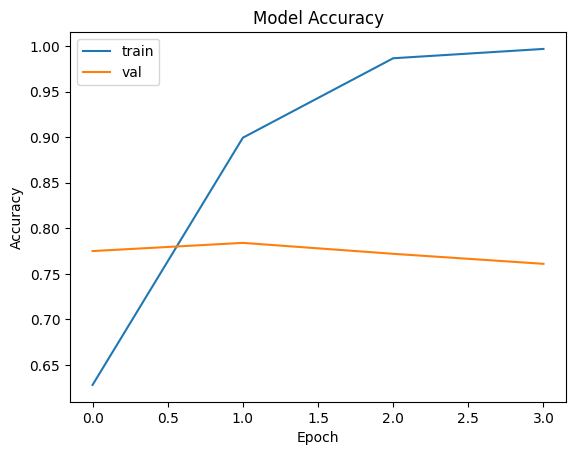

In [53]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

## Prediction
---

In [54]:
pred = model.predict(['''So, I'm wondering while watching this film, did the producers of this movie get to save money on Sandra Bullock's wardrobe by dragging out her "before" clothes from Miss Congeniality? Did Ms. Bullock also get to sleepwalk through the role by channeling the "before" Gracie Hart? As many reviewers have noted before, the film is very formulaic. Add to that the deja vu viewer experiences with the character of Cassie Maywether as a somewhat darker Gracie Hart with more back story and it rapidly become a snooze fest.<br /><br />The two bad boy serial killers have been done before (and better) in other films. As has the "good guy partner trying to protect his partner despite the evidence" character been seen before. In fact none of the characters in the film ever get beyond two dimensions or try to be anything but trite stereotypes.<br /><br />One last peeve - using the term serial killer is false advertising. Murdering one person - even if it's a premeditated murder - does not make you a serial killer. You may have the potential to become a serial killer but you are not a serial killer or even a spree killer.''',])

1/1 [==============================] - 1s 712ms/step


In [55]:
pred > 0.5

array([[ True]])

In [56]:
def predict_sentiment(text, model):
    text = [text]
    pred = model.predict(text)
    print(pred)
    if pred > 0.5:
        return "Positive"
    else:
        return "Negative"

In [57]:
pst_txt = '''One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.'''
predict_sentiment(pst_txt, model)

1/1 [==============================] - 0s 54ms/step
[[0.9477252]]


'Positive'

In [58]:
ngt_txt ='''Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.'''
predict_sentiment(ngt_txt, model)

1/1 [==============================] - 0s 54ms/step
[[0.00742193]]


'Negative'

32/32 [==============================] - 3s 63ms/step


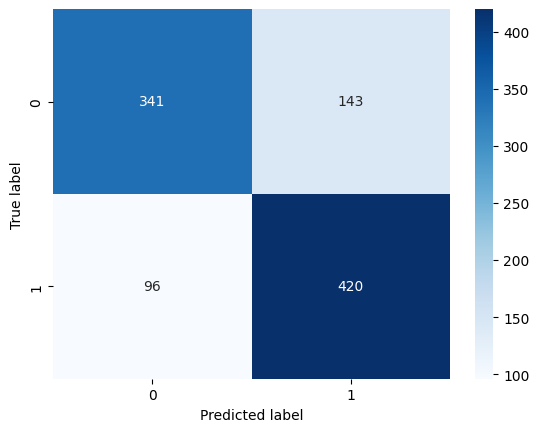

In [59]:
from sklearn.metrics import confusion_matrix
# Confusion MAtrix 
ypred = model.predict(X_test)
ypred = ypred>0.5
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, ypred)
sns.heatmap(cf_matrix,annot = True,fmt ='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()